In [1]:
import os
dir_list = []
for i in os.listdir(r'D:\vivek_sisodiya\EarVN1.0 dataset\Images'):
    dir_list.append(i)
for dr in dir_list:
    os.mkdir(r'D:\vivek_sisodiya\EarVN1.0 dataset\Train'+'\\'+dr)
for dr in dir_list:
    os.mkdir(r'D:\vivek_sisodiya\EarVN1.0 dataset\Test'+'\\'+dr)
import cv2
import numpy as np
from skimage import io 
from skimage.transform import rotate, AffineTransform, warp
import matplotlib.pyplot as plt
import random
from skimage import img_as_ubyte
import os
from skimage.util import random_noise
def anticlockwise_rotation(image):
    angle= random.randint(0,180)
    return rotate(image, angle)

def clockwise_rotation(image):
    angle= random.randint(0,30)
    return rotate(image, -angle)

def h_flip(image):
    return  np.fliplr(image)

def v_flip(image):
    return np.flipud(image)

def add_noise(image):
    return random_noise(image)

def blur_image(image):
    return cv2.GaussianBlur(img, (9,9),0)

#I would not recommend warp_shifting, because it distorts image, but can be used in many use case like 
#classifying blur and non-blur images
def warp_shift(image): 
    transform = AffineTransform(translation=(0,40))  #chose x,y values according to your convinience
    warp_image = warp(image, transform, mode="wrap")
    return warp_image
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip
                       #'zoom':warp_shift
                 }                #use dictionary to store names of functions 
for dr in dir_list:
    images_path=r'D:\vivek_sisodiya\EarVN1.0 dataset\Images'+'\\'+dr #path to original images D:\DP\Sachin Sir\Train\Original
    augmented_path=r'D:\vivek_sisodiya\EarVN1.0 dataset\Train'+'\\'+dr # path to store aumented images D:\DP\Sachin Sir\Train\Original_Augment
    images=[] # to store paths of images from folder

    for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
        images.append(os.path.join(images_path,im))

    images_to_generate=16000  #you can change this value according to your requirement
    i=1                        # variable to iterate till images_to_generate

    while i<=images_to_generate:
        try:
            image=random.choice(images)
            original_image = io.imread(image)
            transformed_image=None
        #     print(i)
            n = 0       #variable to iterate till number of transformation to apply
            transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image

            while n <= transformation_count:
                key = random.choice(list(transformations)) #randomly choosing method to call
                transformed_image = transformations[key](original_image)
                n = n + 1

            new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
            transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
            transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
            cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
            i =i+1
        #to generate more images, put above 3 statement inside while n<... loop
        except:
            continue
transformations = {'rotate anticlockwise': anticlockwise_rotation,
                      'rotate clockwise': clockwise_rotation,
                      'horizontal flip': h_flip, 
                      'vertical flip': v_flip
                       #'zoom':warp_shift
                 }                #use dictionary to store names of functions 
for dr in dir_list:
    images_path=r'D:\vivek_sisodiya\EarVN1.0 dataset\Images'+'\\'+dr #path to original images D:\DP\Sachin Sir\Train\Original
    augmented_path=r'D:\vivek_sisodiya\EarVN1.0 dataset\Test'+'\\'+dr # path to store aumented images D:\DP\Sachin Sir\Train\Original_Augment
    images=[] # to store paths of images from folder

    for im in os.listdir(images_path):  # read image name from folder and append its path into "images" array     
        images.append(os.path.join(images_path,im))

    images_to_generate=4000  #you can change this value according to your requirement
    i=1                        # variable to iterate till images_to_generate

    while i<=images_to_generate:
        try:
            image=random.choice(images)
            original_image = io.imread(image)
            transformed_image=None
        #     print(i)
            n = 0       #variable to iterate till number of transformation to apply
            transformation_count = random.randint(1, len(transformations)) #choose random number of transformation to apply on the image

            while n <= transformation_count:
                key = random.choice(list(transformations)) #randomly choosing method to call
                transformed_image = transformations[key](original_image)
                n = n + 1

            new_image_path= "%s/augmented_image_%s.jpg" %(augmented_path, i)
            transformed_image = img_as_ubyte(transformed_image)  #Convert an image to unsigned byte format, with values in [0, 255].
            transformed_image=cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB) #convert image to RGB before saving it
            cv2.imwrite(new_image_path, transformed_image) # save transformed image to path
            i =i+1
        #to generate more images, put above 3 statement inside while n<... loop
        except:
            continue

In [1]:
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
import numpy as np
import pickle
import cv2
from os import listdir
from sklearn.preprocessing import LabelBinarizer
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model

In [2]:
class MyCustomCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('acc') >= 0.96):   
            print("Reached 95% accuracy so cancelling training!")
            self.model.stop_training = True

In [3]:
EPOCHS =200
INIT_LR = 1e-3
BS = 32
default_image_size = tuple((200, 200))
#image_size = 0
width=200
height=200
depth=3
train_dir=r"D:\vivek_sisodiya\EarVN1.0 dataset\Train"
valid_dir=r"D:\vivek_sisodiya\EarVN1.0 dataset\Test"
train_folder=listdir(train_dir)
valid_folder=listdir(valid_dir)

In [4]:
def convert_image_to_array(image_dir):
    try:
        image = cv2.imread(image_dir)
        if image is not None :
            image = cv2.resize(image, default_image_size)   
            return img_to_array(image)
        else :
            return np.array([])
    except Exception as e:
        print(f"Error : {e}")
        return None

In [5]:
callbacks = MyCustomCallback()

In [6]:
train_image_list, train_image_label= [], []
for disease_folder in train_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{train_dir}/{disease_folder}")
    #print(disease_img_folder)
    #for disease_img in disease_img_folder:
    for disease_img in disease_img_folder[: : 4]:    
        image_directory = f"{train_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".TIFF") == True:
            train_image_list.append(convert_image_to_array(image_directory))
            train_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing 001.ALI_HD ...
processing 002.LeDuong_BL ...
processing 003.BD_Tran ...
processing 004.Binz ...
processing 005.Bui_AT ...
processing 006.Chau_GK ...
processing 007.Chau_KP ...
processing 008.Chi_D ...
processing 009.Chi_Th ...
processing 010.Chu_B ...
processing 011.Cong_To ...
processing 012.Dai_Nhan ...
processing 013.Dam_Vinh_H ...
processing 014.Dan_Ng ...
processing 015.Dan_Trg ...
[INFO] Image loading completed


In [7]:
print(len(train_image_label))

60000


In [8]:
valid_image_list, valid_image_label= [], []
for disease_folder in valid_folder:
    print(f"processing {disease_folder} ...")
    disease_img_folder= listdir(f"{valid_dir}/{disease_folder}")
    #for disease_img in disease_img_folder:
    for disease_img in disease_img_folder[: : 4]: 
        image_directory = f"{valid_dir}/{disease_folder}/{disease_img}"
        if image_directory.endswith(".jpg") == True or image_directory.endswith(".TIFF") == True:
            valid_image_list.append(convert_image_to_array(image_directory))
            valid_image_label.append(disease_folder)
print("[INFO] Image loading completed")

processing 001.ALI_HD ...
processing 002.LeDuong_BL ...
processing 003.BD_Tran ...
processing 004.Binz ...
processing 005.Bui_AT ...
processing 006.Chau_GK ...
processing 007.Chau_KP ...
processing 008.Chi_D ...
processing 009.Chi_Th ...
processing 010.Chu_B ...
processing 011.Cong_To ...
processing 012.Dai_Nhan ...
processing 013.Dam_Vinh_H ...
processing 014.Dan_Ng ...
processing 015.Dan_Trg ...
[INFO] Image loading completed


In [9]:
print(len(valid_image_label))

15000


In [10]:
from sklearn.preprocessing import LabelBinarizer
label_binarizer = LabelBinarizer()
bin_train_image_labels = label_binarizer.fit_transform(train_image_label)
bin_valid_image_labels = label_binarizer.fit_transform(valid_image_label)
pickle.dump(label_binarizer,open('Label_Instance_marine_alex.pkl', 'wb'))
n_classes = len(label_binarizer.classes_)

In [11]:
print(n_classes)

15


In [12]:
np_train_image_list = np.array(train_image_list, dtype=np.float32) / 255.0
np_valid_image_list = np.array(valid_image_list, dtype=np.float32) / 255.0

In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [14]:
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)

In [15]:
# coding: utf8
from tensorflow.keras import layers
from tensorflow.keras import models


#
# image dimensions
#

img_height = 200
img_width = 200
img_channels = 3

#
# network params
#

cardinality = 32


def residual_network(x):
    """
    ResNeXt by default. For ResNet set `cardinality` = 1 above.
    
    """
    def add_common_layers(y):
        y = layers.BatchNormalization()(y)
        y = layers.LeakyReLU()(y)

        return y

    def grouped_convolution(y, nb_channels, _strides):
        # when `cardinality` == 1 this is just a standard convolution
        if cardinality == 1:
            return layers.Conv2D(nb_channels, kernel_size=(3, 3), strides=_strides, padding='same')(y)
        
        assert not nb_channels % cardinality
        _d = nb_channels // cardinality

        # in a grouped convolution layer, input and output channels are divided into `cardinality` groups,
        # and convolutions are separately performed within each group
        groups = []
        for j in range(cardinality):
            group = layers.Lambda(lambda z: z[:, :, :, j * _d:j * _d + _d])(y)
            groups.append(layers.Conv2D(_d, kernel_size=(3, 3), strides=_strides, padding='same')(group))
            
        # the grouped convolutional layer concatenates them as the outputs of the layer
        y = layers.concatenate(groups)

        return y

    def residual_block(y, nb_channels_in, nb_channels_out, _strides=(1, 1), _project_shortcut=False):
        """
        Our network consists of a stack of residual blocks. These blocks have the same topology,
        and are subject to two simple rules:

        - If producing spatial maps of the same size, the blocks share the same hyper-parameters (width and filter sizes).
        - Each time the spatial map is down-sampled by a factor of 2, the width of the blocks is multiplied by a factor of 2.
        """
        shortcut = y

        # we modify the residual building block as a bottleneck design to make the network more economical
        y = layers.Conv2D(nb_channels_in, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        y = add_common_layers(y)

        # ResNeXt (identical to ResNet when `cardinality` == 1)
        y = grouped_convolution(y, nb_channels_in, _strides=_strides)
        y = add_common_layers(y)

        y = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=(1, 1), padding='same')(y)
        # batch normalization is employed after aggregating the transformations and before adding to the shortcut
        y = layers.BatchNormalization()(y)

        # identity shortcuts used directly when the input and output are of the same dimensions
        if _project_shortcut or _strides != (1, 1):
            # when the dimensions increase projection shortcut is used to match dimensions (done by 1×1 convolutions)
            # when the shortcuts go across feature maps of two sizes, they are performed with a stride of 2
            shortcut = layers.Conv2D(nb_channels_out, kernel_size=(1, 1), strides=_strides, padding='same')(shortcut)
            shortcut = layers.BatchNormalization()(shortcut)

        y = layers.add([shortcut, y])

        # relu is performed right after each batch normalization,
        # expect for the output of the block where relu is performed after the adding to the shortcut
        y = layers.LeakyReLU()(y)

        return y

    # conv1
    x = layers.Conv2D(256, kernel_size=(5, 5), strides=(2, 2), padding='same')(x)
    x = add_common_layers(x)

    # conv2
    x = layers.MaxPool2D(pool_size=(3, 3), strides=(2, 2), padding='same')(x)
    for i in range(3):#3
        project_shortcut = True if i == 0 else False
        x = residual_block(x, 64, 128, _project_shortcut=project_shortcut)

    # conv3
    for i in range(4):#4
        # down-sampling is performed by conv3_1, conv4_1, and conv5_1 with a stride of 2
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 128, 256, _strides=strides)

    # conv4
    for i in range(6):#6
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 256, 512, _strides=strides)

    # conv5
    for i in range(3):#3
        strides = (2, 2) if i == 0 else (1, 1)
        x = residual_block(x, 512, 2048, _strides=strides)

    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dense(15,activation='softmax')(x)

    return x


image_tensor = layers.Input(shape=(img_height, img_width, img_channels))
network_output = residual_network(image_tensor)
  
model = models.Model(inputs=[image_tensor], outputs=[network_output])
print(model.summary())

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 100, 100, 256 19456       input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 100, 100, 256 1024        conv2d[0][0]                     
__________________________________________________________________________________________________
leaky_re_lu (LeakyReLU)         (None, 100, 100, 256 0           batch_normalization[0][0]        
______________________________________________________________________________________________

lambda_332 (Lambda)             (None, 13, 13, 8)    0           leaky_re_lu_31[0][0]             
__________________________________________________________________________________________________
lambda_333 (Lambda)             (None, 13, 13, 8)    0           leaky_re_lu_31[0][0]             
__________________________________________________________________________________________________
lambda_334 (Lambda)             (None, 13, 13, 8)    0           leaky_re_lu_31[0][0]             
__________________________________________________________________________________________________
lambda_335 (Lambda)             (None, 13, 13, 8)    0           leaky_re_lu_31[0][0]             
__________________________________________________________________________________________________
lambda_336 (Lambda)             (None, 13, 13, 8)    0           leaky_re_lu_31[0][0]             
__________________________________________________________________________________________________
lambda_337

In [16]:
model.compile(loss="categorical_crossentropy", optimizer=opt,metrics=["accuracy"])

print("[INFO] training network...")

[INFO] training network...


In [17]:
history=model.fit(np_train_image_list,bin_train_image_labels,
                  validation_data=(np_valid_image_list, bin_valid_image_labels),
                  batch_size=BS,
                  epochs=EPOCHS, verbose=1        
                  )

Train on 60000 samples, validate on 15000 samples
Epoch 1/200
60000/60000 [==============================] - 762s 13ms/sample - loss: 2.0157 - accuracy: 0.3767 - val_loss: 2.1589 - val_accuracy: 0.4039
Epoch 2/200
60000/60000 [==============================] - 710s 12ms/sample - loss: 1.0988 - accuracy: 0.6570 - val_loss: 1.2483 - val_accuracy: 0.6385
Epoch 3/200
60000/60000 [==============================] - 707s 12ms/sample - loss: 0.6819 - accuracy: 0.7849 - val_loss: 0.9514 - val_accuracy: 0.7169
Epoch 4/200
60000/60000 [==============================] - 710s 12ms/sample - loss: 0.4697 - accuracy: 0.8507 - val_loss: 0.5860 - val_accuracy: 0.8231
Epoch 5/200
60000/60000 [==============================] - 708s 12ms/sample - loss: 0.3347 - accuracy: 0.8931 - val_loss: 0.5572 - val_accuracy: 0.8315
Epoch 6/200
60000/60000 [==============================] - 707s 12ms/sample - loss: 0.2588 - accuracy: 0.9169 - val_loss: 0.4028 - val_accuracy: 0.8799
Epoch 7/200
60000/60000 [=============

60000/60000 [==============================] - 713s 12ms/sample - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.2060 - val_accuracy: 0.9582
Epoch 55/200
60000/60000 [==============================] - 716s 12ms/sample - loss: 0.0105 - accuracy: 0.9967 - val_loss: 0.1804 - val_accuracy: 0.9612
Epoch 56/200
60000/60000 [==============================] - 716s 12ms/sample - loss: 0.0079 - accuracy: 0.9977 - val_loss: 0.2111 - val_accuracy: 0.9568
Epoch 57/200
60000/60000 [==============================] - 717s 12ms/sample - loss: 0.0078 - accuracy: 0.9975 - val_loss: 0.1902 - val_accuracy: 0.9635
Epoch 58/200
60000/60000 [==============================] - 715s 12ms/sample - loss: 0.0082 - accuracy: 0.9973 - val_loss: 0.1905 - val_accuracy: 0.9621
Epoch 59/200
60000/60000 [==============================] - 719s 12ms/sample - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.1479 - val_accuracy: 0.9705
Epoch 60/200
60000/60000 [==============================] - 719s 12ms/sample - loss: 0.0066 - a

60000/60000 [==============================] - 714s 12ms/sample - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.1755 - val_accuracy: 0.9718
Epoch 108/200
60000/60000 [==============================] - 714s 12ms/sample - loss: 0.0037 - accuracy: 0.9987 - val_loss: 0.1812 - val_accuracy: 0.9695
Epoch 109/200
60000/60000 [==============================] - 715s 12ms/sample - loss: 0.0024 - accuracy: 0.9991 - val_loss: 0.1891 - val_accuracy: 0.9653
Epoch 110/200
60000/60000 [==============================] - 716s 12ms/sample - loss: 0.0019 - accuracy: 0.9993 - val_loss: 0.1599 - val_accuracy: 0.9720
Epoch 111/200
60000/60000 [==============================] - 716s 12ms/sample - loss: 0.0037 - accuracy: 0.9989 - val_loss: 0.1639 - val_accuracy: 0.9719
Epoch 112/200
60000/60000 [==============================] - 715s 12ms/sample - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.1593 - val_accuracy: 0.9713
Epoch 113/200
60000/60000 [==============================] - 716s 12ms/sample - loss: 0.00

60000/60000 [==============================] - 708s 12ms/sample - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.1659 - val_accuracy: 0.9716
Epoch 161/200
60000/60000 [==============================] - 707s 12ms/sample - loss: 0.0010 - accuracy: 0.9996 - val_loss: 0.1539 - val_accuracy: 0.9737
Epoch 162/200
60000/60000 [==============================] - 708s 12ms/sample - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.1782 - val_accuracy: 0.9724
Epoch 163/200
60000/60000 [==============================] - 709s 12ms/sample - loss: 0.0016 - accuracy: 0.9995 - val_loss: 0.2229 - val_accuracy: 0.9639
Epoch 164/200
60000/60000 [==============================] - 705s 12ms/sample - loss: 0.0018 - accuracy: 0.9994 - val_loss: 0.1916 - val_accuracy: 0.9693
Epoch 165/200
60000/60000 [==============================] - 707s 12ms/sample - loss: 2.8558e-04 - accuracy: 0.9999 - val_loss: 0.1685 - val_accuracy: 0.9738
Epoch 166/200
60000/60000 [==============================] - 706s 12ms/sample - loss: 

In [18]:
print("[INFO] Calculating model accuracy")
scores = model.evaluate(np_valid_image_list, bin_valid_image_labels)
print(f"Test Accuracy: {scores[1]*100}")


[INFO] Calculating model accuracy
15000/1 [=============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Test Accuracy: 97.30666875839233


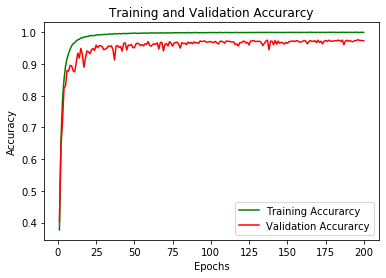

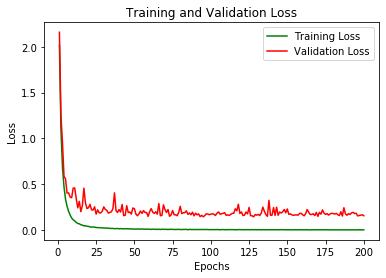

In [19]:

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

#Train and validation accuracy
plt.plot(epochs, acc, 'g', label='Training Accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation Accurarcy')
plt.title('Training and Validation Accurarcy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'g', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
ycalculated = model.predict(np_valid_image_list)

In [24]:
yhat_classes =np.argmax(ycalculated,axis=1)

In [25]:
import numpy as np
rounded_labels=np.argmax(bin_valid_image_labels,axis=1)


In [26]:
from sklearn.metrics import accuracy_score,classification_report 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score 
from sklearn.metrics import cohen_kappa_score 
from sklearn.metrics import roc_auc_score 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import Normalizer
#import seaborn as sns
#y_pred=model.predict_classes(np_valid_image_list)
#con_mat = tf.math.confusion_matrix(labels=y_true, predictions=ycalculated).numpy()
#matrix = confusion_matrix(rounded_labels,yhat_classes)
#y_pred=model.predict(np.array(val_image_list))
#yhat_classes = ["honda", "chevrolet", "honda", "toyota", "toyota", "chevrolet"]
#rounded_labels = ["honda", "chevrolet", "honda", "toyota", "toyota", "honda"]
cm =confusion_matrix(rounded_labels,yhat_classes)  

#matrix =confusion_matrix(bin_val_image_labels.argmax(axis=1), ycalculated)
print(cm)

[[976   5   3   3   0   3   2   3   0   1   0   4   0   0   0]
 [  3 965   7   6   1   1   1   7   0   1   1   3   2   1   1]
 [  3   1 969   6   4   3   1   4   0   4   0   0   2   2   1]
 [  7   7   4 955   1   8   3   4   1   2   0   1   0   5   2]
 [  1   5   4   0 978   1   0   2   0   2   0   1   1   2   3]
 [  5   0   1   3   1 969   0   5   1   0   0   5   0   6   4]
 [  6   1   0   2   0   1 980   0   4   0   0   2   2   0   2]
 [  0   3   1   2   0   0   0 986   1   0   0   1   4   1   1]
 [  3   0   4   3   4   1   3   5 964   1   0   4   3   3   2]
 [  4   4   2   1   1   1   0   0   0 974   1   6   4   2   0]
 [  1   0   1   0   0   0   1   1   0   2 991   0   1   1   1]
 [ 11   0   4   3   0   2   0   1   3   2   0 966   0   7   1]
 [  5   5   5   2   5   2   2   2   0   6   1   2 961   0   2]
 [  0   0   1   1   0   1   0   1   0   0   0   0   0 995   1]
 [  4   1   2   3   1   3   1   3   0   0   0   3   2  10 967]]


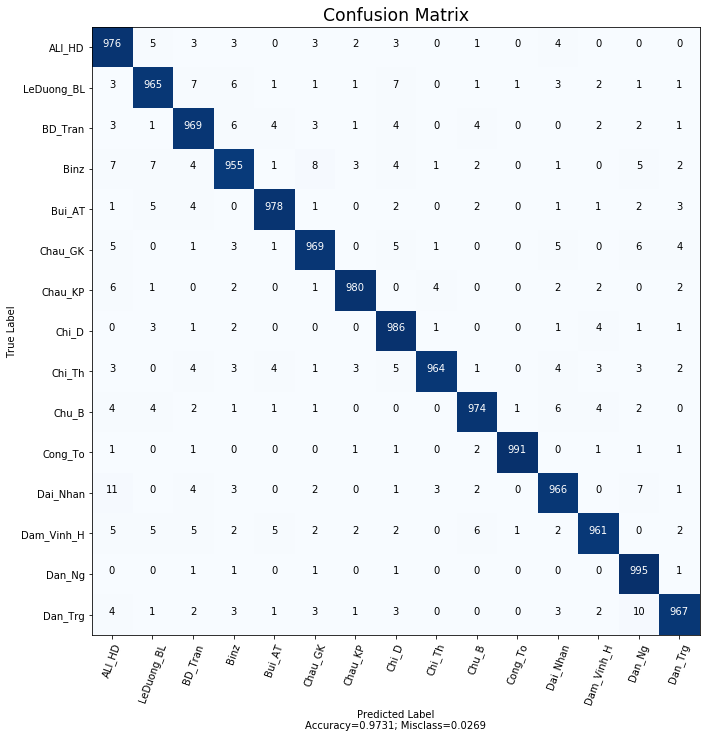

In [27]:
import numpy as np

def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 'xx-large')

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=70)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label\nAccuracy={:0.4f}; Misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()
    
plot_confusion_matrix(cm, 
                      normalize = False,
                      target_names=['ALI_HD','LeDuong_BL','BD_Tran','Binz','Bui_AT','Chau_GK','Chau_KP','Chi_D','Chi_Th',
 'Chu_B','Cong_To','Dai_Nhan','Dam_Vinh_H','Dan_Ng','Dan_Trg'],
                      title        = "Confusion Matrix")

In [28]:
from sklearn.metrics import accuracy_score,classification_report 
target_names =['ALI','LeDuong_BL','BD_Tran','Binz','Bui_AT','Chau_GK','Chau_KP','Chi_D','Chi_Th',
 'Chu_B','Cong_To','Dai_Nhan','Dam_Vinh_H','Dan_Ng','Dan_Trg']
print(classification_report(rounded_labels, yhat_classes, target_names=target_names))

              precision    recall  f1-score   support

         ALI       0.95      0.98      0.96      1000
  LeDuong_BL       0.97      0.96      0.97      1000
     BD_Tran       0.96      0.97      0.97      1000
        Binz       0.96      0.95      0.96      1000
      Bui_AT       0.98      0.98      0.98      1000
     Chau_GK       0.97      0.97      0.97      1000
     Chau_KP       0.99      0.98      0.98      1000
       Chi_D       0.96      0.99      0.97      1000
      Chi_Th       0.99      0.96      0.98      1000
       Chu_B       0.98      0.97      0.98      1000
     Cong_To       1.00      0.99      0.99      1000
    Dai_Nhan       0.97      0.97      0.97      1000
  Dam_Vinh_H       0.98      0.96      0.97      1000
      Dan_Ng       0.96      0.99      0.98      1000
     Dan_Trg       0.98      0.97      0.97      1000

    accuracy                           0.97     15000
   macro avg       0.97      0.97      0.97     15000
weighted avg       0.97   

In [29]:
class_to_label_map={ 0:'ALI_HD',1:'LeDuong_BL',2:'BD_Tran',3:'Binz',4:'Bui_AT',5:'Chau_GK',6:'Chau_KP',7:'Chi_D',8:'Chi_Th',9:'Chu_B',
 10:'Cong_To',11:'Dai_Nhan',12:'Dam_Vinh_H',13:'Dan_Ng',14:'Dan_Trg'}

C:\Users\Glau\.conda\envs\vivek_sisodiya\lib\site-packages\ipykernel_launcher.py:36: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead


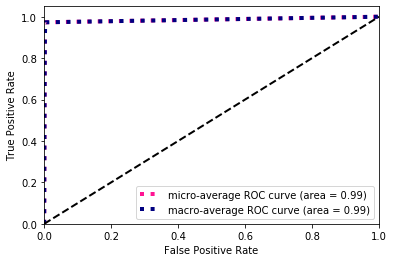

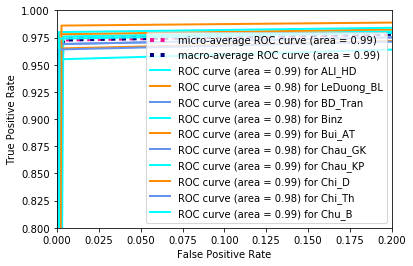

In [30]:
from sklearn.datasets import make_classification
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

n_classes =15

from sklearn.metrics import roc_curve, auc

# Plot linewidth.
lw = 2
lb = LabelBinarizer()
lb.fit(rounded_labels)
y_test= lb.transform(rounded_labels)
snn_pred = lb.transform(yhat_classes)
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], snn_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), snn_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure(1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes-97), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


# Zoom in view of the upper left corner.
#plt.figure(figsize=(10,10)
plt.figure(2)
plt.xlim(0, 0.2)
plt.ylim(0.8, 1)
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(10), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve (area = %0.2f) for %s' % (roc_auc[i], class_to_label_map[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw,color='white')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
#plt.title('Receiver operating characteristic of Cell')
plt.legend(loc="lower right")
plt.show()

In [32]:
model.save('ear_Alex_net.h5')